# **Problem Statement:**

BigMart, a retail giant, has accumulated extensive sales data from the year 2013, encompassing 1559 products distributed across 10 stores situated in various cities. This dataset includes a plethora of attributes associated with each product and store. In light of this, the objective of this data science project is to develop a robust predictive model that can effectively forecast the sales of individual products within specific stores. The outcome of this endeavor will empower BigMart to gain valuable insights into product performance, optimize inventory management, and enhance overall sales strategy. The predictive model should be capable of providing accurate sales predictions based on the given attributes, enabling BigMart to make informed decisions to maximize profitability and improve customer satisfaction.

# Hypothese generation

**Store Location Impact:** The location of a store may significantly influence the sales of products. Hypothesize that stores located in more populated or urban areas may experience higher sales compared to stores in less populated or rural areas.

**Product Visibility:** Products that are strategically placed or have better shelf visibility within a store might witness higher sales. Hypothesize that the location of a product within a store can impact its sales.

**Product Characteristics:** Certain product attributes such as weight, size, and quality may affect sales. Hypothesize that products with certain characteristics, like being lightweight or having superior quality, may have higher sales.

**Store Size and Layout:** The size and layout of a store may influence the sales of products. Hypothesize that larger stores or stores with a particular layout may exhibit different sales patterns.


In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder,CountEncoder


**IMPORTING THE DATA**

In [2]:
data=pd.read_csv('Train.csv')
data1=pd.read_csv('Test.csv')

**EDA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [5]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
data1['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [7]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace="LF",value="Low Fat")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace="low fat",value="Low Fat")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace="reg",value="Regular")

data1['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace="LF",value="Low Fat")
data1['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace="low fat",value="Low Fat")
data1['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace="reg",value="Regular")

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

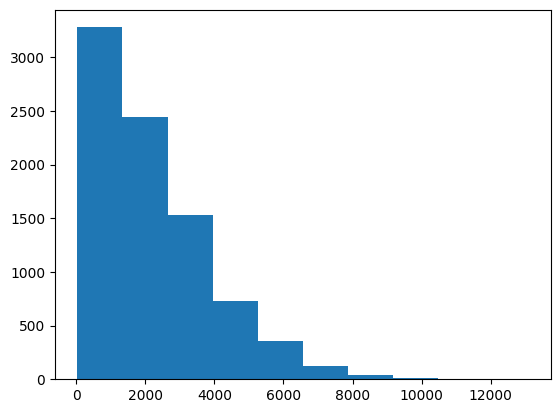

In [11]:
plt.hist(data['Item_Outlet_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16a42b97cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x16a44d92b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a44d90a50>],
 'medians': [<matplotlib.lines.Line2D at 0x16a44d9c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a44d9cb10>],
 'means': []}

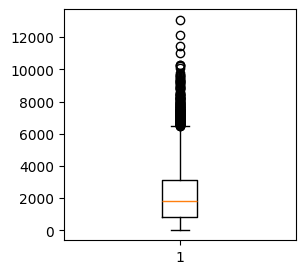

In [12]:
plt.figure(figsize=(3,3))
plt.boxplot(data['Item_Outlet_Sales'])

<BarContainer object of 8523 artists>

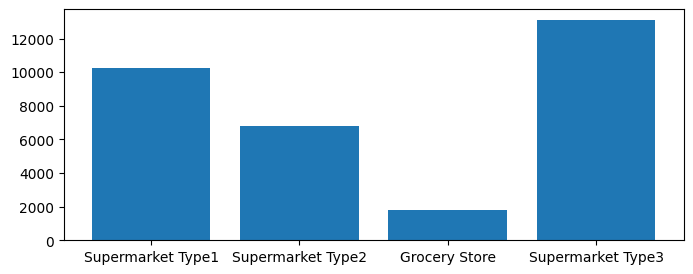

In [13]:
plt.figure(figsize=(8,3))
plt.bar(data['Outlet_Type'],data['Item_Outlet_Sales'])

<BarContainer object of 8523 artists>

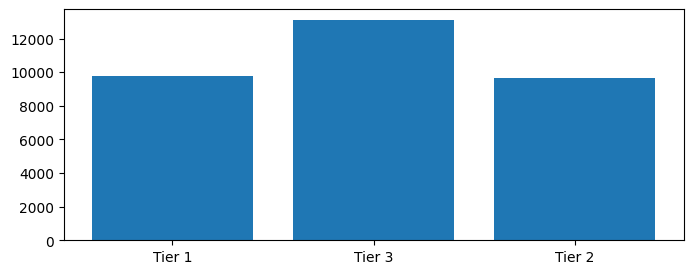

In [14]:
plt.figure(figsize=(8,3))
plt.bar(data['Outlet_Location_Type'],data['Item_Outlet_Sales'])

**IN THIS DATASET WE HAVE THE CORRELATION BETWEEN THE NULL VALUES COLUMNS SO WE ARE USING THIS MANUALLY**


In [15]:
from scipy.stats import chi2_contingency
def chi_sq_test(var1, var2):
  cont_table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(cont_table)
  if p < 0.05:
    print('Accept the Alternate Hypothesis (There is a realation between var1 and var2)', round(p, 2))
  else:
    print('Failed to Reject Null Hypothesis (There is no relation between var1 and var2)', round(p, 2))
  return cont_table

In [16]:
chi_sq_test(data['Outlet_Size'], data['Outlet_Location_Type'])


Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [17]:
chi_sq_test(data['Item_Fat_Content'], data['Item_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


In [18]:
#this is for numerical null values
item_weight_mean=data.pivot_table(values="Item_Weight",index="Item_Identifier")
miss_pos=data['Item_Weight'].isnull()
for i,item in enumerate(data['Item_Identifier']):
    if miss_pos[i]==True:
        if item in item_weight_mean:
            data['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i]= data['Item_Weight'].mean()


item_weight_mean=data1.pivot_table(values="Item_Weight",index="Item_Identifier")
miss_pos=data1['Item_Weight'].isnull()
for i,item in enumerate(data1['Item_Identifier']):
    if miss_pos[i]==True:
        if item in item_weight_mean:
            data1['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            data1['Item_Weight'][i]= data1['Item_Weight'].mean()

C:\Users\simon\AppData\Local\Temp\ipykernel_11708\2913482720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Weight'][i]= data['Item_Weight'].mean()
C:\Users\simon\AppData\Local\Temp\ipykernel_11708\2913482720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Weight'][i]= data['Item_Weight'].mean()
C:\Users\simon\AppData\Local\Temp\ipykernel_11708\2913482720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
# this is for categorical null values
mode_null=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x: x.mode()))
miss_null=data['Outlet_Size'].isnull()
data.loc[miss_null,'Outlet_Size']=data.loc[miss_null,'Outlet_Type'].apply(lambda x: mode_null[x])

mode_null=data1.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x: x.mode()))
miss_null=data1['Outlet_Size'].isnull()
data1.loc[miss_null,'Outlet_Size']=data1.loc[miss_null,'Outlet_Type'].apply(lambda x: mode_null[x])

In [20]:
result_df=data1[['Item_Identifier', 'Outlet_Identifier']]

In [21]:
#DROPING THE UNWANTED COLUMNS
data.drop(['Item_Identifier', 'Outlet_Identifier'], inplace = True,axis=1)

data1.drop(['Item_Identifier', 'Outlet_Identifier'], inplace = True,axis=1)

**User define function for preprocessing**

In [22]:
def find_max_categorical(data):
    max_category={}
    for i in data:
        if type(data[i].values[0]) == str:
            max_category[i]=len(data[i].unique())
    return max(max_category,key= lambda x: max_category[x])

In [23]:
def EDA(data):
    #max_category=find_max_categorical(data)
    for i in data:

        #filling the null values
        if (data[i].isnull().sum())> 0 :
            # if it have the category values
            if type(data[i].values[0]) == str:
                data[i].fillna((data[i].mode()[0]),inplace=True)
                #data[i].fillna(method='ffill',inplace=True)
            else:  # if it have numeric values
                data[i].fillna(data[i].mean(),inplace=True)

        #count encoding
        """if i == max_category:
            encoder=CountEncoder()
            data[i] = encoder.fit_transform(data[i])"""

        #one hot encoding  and  label encoding
        if type(data[i].values[0]) == str:
            if len(data[i].unique()) > 3:
                data=pd.get_dummies(data,columns=[i])
            else:
                la=LabelEncoder()
                data[i]=la.fit_transform(data[i])

    return data
                
            

**STORE THE DATA IN X AND Y**

In [24]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
find_max_categorical(data)

'Item_Type'

In [26]:
X=EDA(data)#,target=data['Item_Outlet_Sales'])
y=EDA(data1)#,target=data['Item_MRP'])

**SPLITING THE DATA**

In [27]:
X_train=X.drop(columns=["Item_Outlet_Sales"])
y_train=X["Item_Outlet_Sales"]



**IN OUR TEST DATASET THERE IS NO DEPENDENT VARIABLE**

In [28]:
X_test=y

In [29]:
le=LinearRegression()
model=le.fit(X_train,y_train)

In [30]:
y_pred=model.predict(X_test)

In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated Mean Squared Error: {-cv_scores.mean()}')

Cross-validated Mean Squared Error: 1284900.827756903


In [32]:
from sklearn.linear_model import Ridge
rg = Ridge()
model=rg.fit(X_train, y_train)
y_pred_ridge=model.predict(X_test)

In [33]:
from sklearn.ensemble import RandomForestRegressor
# Create a random forest regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

In [34]:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [35]:
y['Item_Outlet_Sales']=xgb_model.predict(X_test)

In [36]:
y.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750000,0,0.007565,107.8622,1999,1,0,False,False,False,...,False,False,True,False,False,False,True,False,False,1202.715088
1,8.300000,1,0.038428,87.3198,2007,2,1,False,False,False,...,False,False,False,False,False,False,True,False,False,1519.461182
2,14.600000,0,0.099575,241.7538,1998,2,2,False,False,False,...,True,False,False,False,False,True,False,False,False,516.410583
3,7.315000,1,0.015388,155.0340,2007,2,1,False,False,False,...,False,False,True,False,False,False,True,False,False,2532.877686
4,12.695633,0,0.118599,234.2300,1985,1,2,False,False,False,...,False,False,False,False,False,False,False,False,True,6783.751953


In [37]:
result_df

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [38]:
result_df['Item_Outlet_Sales']=y["Item_Outlet_Sales"]

C:\Users\simon\AppData\Local\Temp\ipykernel_11708\1947756902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Item_Outlet_Sales']=y["Item_Outlet_Sales"]


In [39]:
final_df=pd.DataFrame()
for i in result_df['Outlet_Identifier'].unique():
    result_df.index=result_df['Outlet_Identifier']
    final_result=result_df.loc[i,['Item_Identifier','Item_Outlet_Sales']]
    final_df=pd.concat([final_df,final_result])

In [40]:
final_df

,Item_Identifier,Item_Outlet_Sales
Outlet_Identifier,,
OUT049,FDW58,1202.715088
OUT049,FDU11,2170.516113
OUT049,FDM24,2597.829346
OUT049,FDG02,2718.310303
OUT049,NCX06,3086.984131
...,...,...
OUT035,FDU52,2595.818359
OUT035,NCM30,755.902649
OUT035,FDN20,3285.380859


In [41]:
final_df.reset_index(level=0, inplace=True) 
final_df

,Outlet_Identifier,Item_Identifier,Item_Outlet_Sales
0,OUT049,FDW58,1202.715088
1,OUT049,FDU11,2170.516113
2,OUT049,FDM24,2597.829346
3,OUT049,FDG02,2718.310303
4,OUT049,NCX06,3086.984131
...,...,...,...
5676,OUT035,FDU52,2595.818359
5677,OUT035,NCM30,755.902649
5678,OUT035,FDN20,3285.380859
5679,OUT035,NCV30,1083.735718


In [42]:
final_df.to_csv('output.csv', index = False)